In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



In [2]:
df.columns

Index(['Unnamed: 0', 'id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'tfa_date', 'duration',
       'cat_duration'],
      dtype='object')

In [3]:
df_session.columns

Index(['Unnamed: 0', 'user_id', 'action', 'device_type', 'secs_elapsed',
       'action_type', 'action_detail'],
      dtype='object')

In [4]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [7]:
df_target=df[['id','cat_duration']]

In [8]:
df_target

,id,cat_duration
0,87mebub9p4,S
1,osr2jwljor,F
2,lsw9q7uk0j,S
3,0d01nltbrs,S
4,a1vcnhxeij,S
...,...,...
86955,7plqriggxp,F
86956,msucfwmlzc,S
86957,omlc9iku7t,S
86958,0k26r3mir0,S


In [9]:
# 나중에 두가지 그룹으로 분류 하는데 그때 쓰기 위해 
merge_left = pd.merge(df_session,df_target, how='left', left_on='id', right_on='id')



In [10]:
merge_left.isnull().sum()

id                     0
action                 0
device_type            0
secs_elapsed           0
action_type            0
action_detail          0
cat_duration     7902887
dtype: int64

In [11]:
# 없는 ID 제거 해용
merge_left=merge_left.dropna()

In [12]:
merge_left.isnull().sum()

id               0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
cat_duration     0
dtype: int64

In [13]:
# action detail 이 적절하게 사용 되어있나. 
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [14]:
df_d

,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,action_detail_apply_coupon,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0,0,0,0,0,0,0,0,0,0,...,0,5.0,0,0,0,4.0,0,0,0,2
0010k6l0om,0,0,0,0,0,0,0,0,0,0,...,0,10.0,0,0,0,8.0,0,0,0,0
001wyh0pz8,0,0,0,0,0,0,0,0,0,0,...,0,66.0,0,0,0,0.0,0,0,0,0
0028jgx1x1,0,0,0,0,0,0,0,0,0,0,...,0,9.0,0,0,0,0.0,0,0,0,0
002qnbzfs5,0,0,0,0,0,0,0,0,0,0,...,0,167.0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,0,0,0,0,0,0,0,0,0,0,...,0,16.0,0,0,0,5.0,0,0,0,2
zzy7t0y9cm,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,2.0,0,0,0,0
zzysuoqg6x,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0.0,0,0,0,0


In [15]:
# target value와 merge 를 함으로써 action detail 분포를 확인한다. 
merge_action = pd.merge(df_d,df_target, how='left', left_on='id', right_on='id')



In [16]:
merge_action.isnull().sum()

id                                                  0
action_detail_account_notification_settings         0
action_detail_account_payment_methods               0
action_detail_account_payout_preferences            0
action_detail_account_privacy_settings              0
                                                ...  
action_detail_wishlist_note                         0
action_detail_your_listings                         0
action_detail_your_reservations                     0
action_detail_your_trips                            0
cat_duration                                   106756
Length: 156, dtype: int64

In [17]:
merge_action=merge_action.dropna()

In [18]:
merge_action.head()

,id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,cat_duration
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,5.0,0,0,0,4.0,0,0,0,2,F
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,167.0,0,0,0,0.0,0,0,0,0,F
6,0035hobuyj,0,0,0,0,0,0,0,0,0,...,200.0,0,0,0,26.0,0,0,0,0,F
16,006mls2sjw,0,0,0,0,0,0,0,0,0,...,23.0,0,0,4,37.0,0,0,0,0,S
17,006t3vhawl,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,1.0,0,0,0,0,S


In [19]:
# S=0 , F=1 로 함으로써 문자를 숫자로 변환
merge_action.loc[merge_action.cat_duration=='S', 'cat_duration'] = 0
merge_action.loc[merge_action.cat_duration=='F', 'cat_duration'] = 1


merge_action.head()

In [20]:
merge_action.head()

,id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,cat_duration
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,5.0,0,0,0,4.0,0,0,0,2,1
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,167.0,0,0,0,0.0,0,0,0,0,1
6,0035hobuyj,0,0,0,0,0,0,0,0,0,...,200.0,0,0,0,26.0,0,0,0,0,1
16,006mls2sjw,0,0,0,0,0,0,0,0,0,...,23.0,0,0,4,37.0,0,0,0,0,0
17,006t3vhawl,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,1.0,0,0,0,0,0


merge_action.isnull().sum()

In [21]:
merge_action.isnull().sum()

id                                             0
action_detail_account_notification_settings    0
action_detail_account_payment_methods          0
action_detail_account_payout_preferences       0
action_detail_account_privacy_settings         0
                                              ..
action_detail_wishlist_note                    0
action_detail_your_listings                    0
action_detail_your_reservations                0
action_detail_your_trips                       0
cat_duration                                   0
Length: 156, dtype: int64

In [22]:
# 두 집단의 t-test
merge_action_s=merge_action[merge_action['cat_duration'] ==0]
merge_action_f=merge_action[merge_action['cat_duration'] ==1]

In [23]:
action_col=merge_action.drop(['id','cat_duration'],axis=1)


In [24]:
col_ma=list(action_col.columns)

In [25]:
merge_action_s[col_ma[0]]

16        0
17        0
18        0
23        0
37        0
         ..
135422    0
135431    0
135439    0
135448    2
135482    0
Name: action_detail_account_notification_settings, Length: 14728, dtype: uint8

In [26]:
len(col_ma)

154

In [27]:
merge_action_s=merge_action_s.drop(['id','cat_duration'],axis=1)
merge_action_f=merge_action_f.drop(['id','cat_duration'],axis=1)


In [47]:
#F값이란 집단간 분산/집단내 분산을 말한다. 따라서 F값이 크면클수록 두 표본의 분산이 동일하지 않다는 뜻이다.
#F값이 404.328, p-value가 0.000으로 신뢰수준 99%하에서 두 표본의 분산이 동일하지않은 것으로 확인되었다. 
#등분산이 아니기 때문에 equal_var=False로 입력하고 계속 독립표본 t-검정을 진행한다.
#신뢰 수준 99% 기준으로 사용한다. 낮으면 가설이 기각 즉 영향이 있다.
from scipy import stats
for i in col_ma:
    t_test1=merge_action_s[i]
    t_test2=merge_action_f[i]
    lresult = stats.levene(t_test1,t_test2)
    # F value 를 nan 값은 적절하지 않는 변수라고 생각해 뺀다. 
    if np.isnan(lresult[0]):
        col_ma.remove(i)
    elif lresult[0]>10 and lresult[1]<0.05:
        result = stats.ttest_ind(t_test1.values, t_test2.values, equal_var=False)
        if result[1]> 0.01:
            col_ma.remove(i)
    else: 
        result = stats.ttest_ind(t_test1.values, t_test2.values)
        if result[1]> 0.01:
            col_ma.remove(i)


In [48]:
len(col_ma)


83

In [49]:
from scipy import stats
for i in col_ma:
    t_test1=merge_action_s[i]
    t_test2=merge_action_f[i]
    lresult = stats.levene(t_test1,t_test2)
    # F value 를 nan 값은 적절하지 않는 변수라고 생각해 뺀다. 
    if np.isnan(lresult[0]):
        col_ma.remove(i)
    elif lresult[0]>10 and lresult[1]<0.05:
        result = stats.ttest_ind(t_test1.values, t_test2.values, equal_var=False)
        print('t statistic : %.3f \np-value : %.3f' % (result))
    else: 
        result = stats.ttest_ind(t_test1.values, t_test2.values)
        print('t statistic : %.3f \np-value : %.3f' % (result))


t statistic : -9.965 
p-value : 0.000
t statistic : -4.611 
p-value : 0.000
t statistic : -3.903 
p-value : 0.000
t statistic : -3.017 
p-value : 0.003
t statistic : -11.832 
p-value : 0.000
t statistic : -4.452 
p-value : 0.000
t statistic : -4.426 
p-value : 0.000
t statistic : -37.100 
p-value : 0.000
t statistic : -25.320 
p-value : 0.000
t statistic : -10.022 
p-value : 0.000
t statistic : -10.986 
p-value : 0.000
t statistic : 2.965 
p-value : 0.003
t statistic : -3.258 
p-value : 0.001
t statistic : -2.978 
p-value : 0.003
t statistic : -29.753 
p-value : 0.000
t statistic : -4.457 
p-value : 0.000
t statistic : -4.770 
p-value : 0.000
t statistic : -3.130 
p-value : 0.002
t statistic : 22.142 
p-value : 0.000
t statistic : -46.363 
p-value : 0.000
t statistic : -18.375 
p-value : 0.000
t statistic : -23.305 
p-value : 0.000
t statistic : -14.641 
p-value : 0.000
t statistic : -15.713 
p-value : 0.000
t statistic : 3.002 
p-value : 0.003
t statistic : 3.503 
p-value : 0.000
t st

In [50]:
len(col_ma)

83

In [51]:
merge_action_ma=merge_action[col_ma]

In [52]:
merge_action.head(100)

,id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,cat_duration
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,5.0,0,0,0,4.0,0,0,0,2,1
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,167.0,0,0,0,0.0,0,0,0,0,1
6,0035hobuyj,0,0,0,0,0,0,0,0,0,...,200.0,0,0,0,26.0,0,0,0,0,1
16,006mls2sjw,0,0,0,0,0,0,0,0,0,...,23.0,0,0,4,37.0,0,0,0,0,0
17,006t3vhawl,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0466lq65dq,1,0,0,0,0,0,0,0,0,...,42.0,0,0,1,39.0,0,0,0,0,0
429,04atg7t0xx,0,0,0,0,0,0,0,0,0,...,4.0,0,0,0,13.0,0,0,0,0,0
438,04bzkdej2v,0,0,0,0,0,0,0,0,0,...,2.0,0,0,0,8.0,0,0,0,0,0
442,04d68cd73s,0,0,0,0,0,0,0,0,0,...,10.0,0,0,0,3.0,0,0,0,0,0


In [53]:
merge_action_s=merge_action[merge_action['cat_duration'] ==0]
merge_action_f=merge_action[merge_action['cat_duration'] ==1]

In [54]:
merge_left.head()

,id,action,device_type,secs_elapsed,action_type,action_detail,cat_duration
0,d1mm9tcy42,search_results,Windows Desktop,18,click,view_search_results,S
1,d1mm9tcy42,search_results,Windows Desktop,6,click,view_search_results,S
2,d1mm9tcy42,search_results,Windows Desktop,2,click,view_search_results,S
3,d1mm9tcy42,personalize,Windows Desktop,0,data,wishlist_content_update,S
4,d1mm9tcy42,index,Windows Desktop,5,view,view_search_results,S


In [55]:
new_col_ma=[]
for i in col_ma:
    new_col_ma.append(i[14:])

In [56]:
new_col_ma

['account_notification_settings',
 'account_transaction_history',
 'alteration_field',
 'alteration_request',
 'apply_coupon',
 'apply_coupon_click',
 'apply_coupon_error',
 'at_checkpoint',
 'cancellation_policies',
 'cancellation_policy_click',
 'change_or_alter',
 'change_trip_characteristics',
 'complete_booking',
 'confirm_email',
 'confirm_email_link',
 'coupon_code_click',
 'coupon_field_focus',
 'create_alteration_request',
 'create_listing',
 'create_phone_numbers',
 'create_user',
 'dashboard',
 'delete_phone_numbers',
 'edit_profile',
 'email_wishlist',
 'email_wishlist_button',
 'guest_cancellation',
 'guest_itinerary',
 'guest_receipt',
 'header_userpic',
 'host_home',
 'list_your_space',
 'listing_descriptions',
 'listing_reviews',
 'listing_reviews_page',
 'login_page',
 'lookup_message_thread',
 'manage_listing',
 'message_inbox',
 'message_post',
 'message_thread',
 'message_to_host_change',
 'message_to_host_focus',
 'oauth_login',
 'oauth_response',
 'p1',
 'p3',
 'p

In [57]:
merge_action.head()

,id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips,cat_duration
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,5.0,0,0,0,4.0,0,0,0,2,1
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,167.0,0,0,0,0.0,0,0,0,0,1
6,0035hobuyj,0,0,0,0,0,0,0,0,0,...,200.0,0,0,0,26.0,0,0,0,0,1
16,006mls2sjw,0,0,0,0,0,0,0,0,0,...,23.0,0,0,4,37.0,0,0,0,0,0
17,006t3vhawl,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,1.0,0,0,0,0,0


In [58]:
len(col_ma)


83

In [70]:
# 20개씩으로 나눴다 
n = 20
result = [col_ma[i * n:(i + 1) * n] for i in range((len(col_ma) + n - 1) // n )] 

In [71]:
result[0]

['action_detail_account_notification_settings',
 'action_detail_account_transaction_history',
 'action_detail_alteration_field',
 'action_detail_alteration_request',
 'action_detail_apply_coupon',
 'action_detail_apply_coupon_click',
 'action_detail_apply_coupon_error',
 'action_detail_at_checkpoint',
 'action_detail_cancellation_policies',
 'action_detail_cancellation_policy_click',
 'action_detail_change_or_alter',
 'action_detail_change_trip_characteristics',
 'action_detail_complete_booking',
 'action_detail_confirm_email',
 'action_detail_confirm_email_link',
 'action_detail_coupon_code_click',
 'action_detail_coupon_field_focus',
 'action_detail_create_alteration_request',
 'action_detail_create_listing',
 'action_detail_create_phone_numbers']

In [91]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor


X=merge_action[result[0]]
y=merge_action['cat_duration']

hits = np.zeros((len(X.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestRegressor(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [92]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
X=merge_action[result[0]]
y=merge_action['cat_duration']

forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area0 = X.columns[boruta.support_].to_list()
blue_area0 = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area0)
print('features in the blue area:', blue_area0)

features in the green area: ['action_detail_at_checkpoint', 'action_detail_cancellation_policies', 'action_detail_change_trip_characteristics', 'action_detail_confirm_email_link', 'action_detail_create_listing', 'action_detail_create_phone_numbers']
features in the blue area: []


In [93]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
X1=merge_action[result[1]]
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area1 = X1.columns[boruta.support_].to_list()
blue_area1 = X1.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area1)
print('features in the blue area:', blue_area1)

features in the green area: ['action_detail_guest_itinerary', 'action_detail_guest_receipt', 'action_detail_list_your_space', 'action_detail_listing_reviews_page', 'action_detail_message_inbox', 'action_detail_message_post']
features in the blue area: []


In [94]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
X2=merge_action[result[2]]
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area2 = X2.columns[boruta.support_].to_list()
blue_area2 = X2.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area2)
print('features in the blue area:', blue_area2)

features in the green area: ['action_detail_p4', 'action_detail_p4_refund_policy_terms', 'action_detail_payment_instruments', 'action_detail_popular_wishlists', 'action_detail_read_policy_click', 'action_detail_request_new_confirm_email']
features in the blue area: []


In [95]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
X3=merge_action[result[3]]
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area3 = X1.columns[boruta.support_].to_list()
blue_area3 = X1.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area3)
print('features in the blue area:', blue_area3)

features in the green area: ['action_detail_guest_itinerary', 'action_detail_guest_receipt', 'action_detail_list_your_space', 'action_detail_listing_reviews_page', 'action_detail_message_inbox', 'action_detail_message_post']
features in the blue area: []


In [96]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
X4=merge_action[result[4]]
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area4 = X1.columns[boruta.support_].to_list()
blue_area4 = X1.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area4)
print('features in the blue area:', blue_area4)

features in the green area: ['action_detail_guest_itinerary', 'action_detail_guest_receipt', 'action_detail_list_your_space', 'action_detail_listing_reviews_page', 'action_detail_message_inbox', 'action_detail_message_post']
features in the blue area: []


In [100]:
union1=list(set(green_area0)|set(green_area1))
union2=list(set(union1)|set(green_area2))
union3=list(set(union2)|set(green_area3))
union4=list(set(union3)|set(green_area4))

In [ ]:
union4

In [110]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(merge_left, feature)


In [113]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

,id,action_count
0,nv9l110vij,37
1,u0bcx7q0q5,37
2,72l08wwq8m,43
3,01d0rmob25,15
4,qtfte9x03l,54
...,...,...
28722,1d4ql28cae,9
28723,v8yo1e12ij,242
28724,ngsp1mcn9k,71
28725,u9scg755ml,169


In [114]:
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [115]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [116]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [117]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [118]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [119]:
sessions_new=sessions_new.drop(['action_detail'],axis=1)

In [120]:
sessions_new=sessions_new.drop(['action','action_type'],axis=1)

In [121]:
sessions_new

,id,action_count,total_secs,device_type
0,nv9l110vij,37,130,Windows Desktop
1,u0bcx7q0q5,37,130,Mac Desktop
2,72l08wwq8m,43,43,iPhone
3,01d0rmob25,15,43,Windows Desktop
4,qtfte9x03l,54,190,Mac Desktop
...,...,...,...,...
28722,1d4ql28cae,9,36,Mac Desktop
28723,v8yo1e12ij,242,1415,Windows Desktop
28724,ngsp1mcn9k,71,270,Mac Desktop
28725,u9scg755ml,169,409,iPhone


In [126]:
union4.append('id')
union4.append('cat_duration')

In [128]:
union4.remove('id')

In [129]:
union4

['action_detail_listing_reviews_page',
 'action_detail_guest_receipt',
 'action_detail_p4',
 'action_detail_list_your_space',
 'action_detail_message_post',
 'action_detail_message_inbox',
 'action_detail_popular_wishlists',
 'action_detail_cancellation_policies',
 'action_detail_p4_refund_policy_terms',
 'action_detail_change_trip_characteristics',
 'action_detail_create_listing',
 'action_detail_request_new_confirm_email',
 'action_detail_at_checkpoint',
 'action_detail_read_policy_click',
 'action_detail_payment_instruments',
 'action_detail_guest_itinerary',
 'action_detail_confirm_email_link',
 'action_detail_create_phone_numbers',
 'id',
 'cat_duration']

In [130]:
final_detail=merge_action[union4]

In [131]:
final_detail

,action_detail_listing_reviews_page,action_detail_guest_receipt,action_detail_p4,action_detail_list_your_space,action_detail_message_post,action_detail_message_inbox,action_detail_popular_wishlists,action_detail_cancellation_policies,action_detail_p4_refund_policy_terms,action_detail_change_trip_characteristics,action_detail_create_listing,action_detail_request_new_confirm_email,action_detail_at_checkpoint,action_detail_read_policy_click,action_detail_payment_instruments,action_detail_guest_itinerary,action_detail_confirm_email_link,action_detail_create_phone_numbers,id,cat_duration
0,0,0,0,0,1.0,0,0,0,0,2.0,0,0,0,0,0,0,1,0,00023iyk9l,1
4,0,0,0,0,16.0,45,0,0,0,0.0,0,0,1,0,12,0,1,1,002qnbzfs5,1
6,0,0,0,0,3.0,0,0,0,0,21.0,0,0,0,0,0,0,1,0,0035hobuyj,1
16,0,0,0,0,0.0,0,0,0,0,25.0,0,0,0,0,0,0,1,0,006mls2sjw,0
17,0,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,1,0,006t3vhawl,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135453,0,0,0,0,1.0,0,0,2,0,0.0,0,0,0,0,0,0,0,1,zzq90ckj2z,1
135470,0,0,0,0,1.0,0,0,0,0,0.0,0,0,0,0,0,0,1,1,zzv8sgicbk,1
135473,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,zzvr84im58,1
135479,0,0,0,0,0.0,0,0,0,0,1.0,0,0,0,0,0,0,1,0,zzy7t0y9cm,1


In [134]:
final_fs = pd.merge(final_detail,sessions_new, how='left', left_on='id', right_on='id')

In [135]:
final_fs.isnull().sum()

action_detail_listing_reviews_page           0
action_detail_guest_receipt                  0
action_detail_p4                             0
action_detail_list_your_space                0
action_detail_message_post                   0
action_detail_message_inbox                  0
action_detail_popular_wishlists              0
action_detail_cancellation_policies          0
action_detail_p4_refund_policy_terms         0
action_detail_change_trip_characteristics    0
action_detail_create_listing                 0
action_detail_request_new_confirm_email      0
action_detail_at_checkpoint                  0
action_detail_read_policy_click              0
action_detail_payment_instruments            0
action_detail_guest_itinerary                0
action_detail_confirm_email_link             0
action_detail_create_phone_numbers           0
id                                           0
cat_duration                                 0
action_count                                 0
total_secs   

In [136]:
final_fs.to_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/final_session.csv', index=False, encoding='cp949') 




In [82]:
"""
from multiprocessing import Pool
import lightgbm as lgb
from functools import partial
def lgb_boruta(iter_,train_x) :
    print(iter_)
    np.random.seed(iter_)
    X_shadow = train_x.apply(np.random.permutation)
    X_boruta = pd.concat([train_x, X_shadow], axis = 1)
    columns = train_x.columns.tolist() + [f"shadow_{i}" for i in train_x.columns.tolist()]
    X_boruta.columns = columns
    boruta_fac_var = fac_var + [f"shadow_{i}" for i in fac_var]
    dtrain = lgb.Dataset(X_boruta,label=train_y,
                         feature_name = columns,
                         categorical_feature = boruta_fac_var)
    param = {'numleaves': 20, 'mindatainleaf': 20,
             'objective':'binary','maxdepth': 5, 
             "boosting": "rf","bagging_freq" : 1 , "bagging_fraction" : 0.8,
             'learningrate': 0.01,"metric": 'auc',
             "lambdal1": 0.1, "randomstate": 133,"verbosity": -1,
             "num_threads" : 1
            }
    lgbmclf = lgb.train(param, dtrain, 500,verbose_eval=-1,
#                         valid_sets=dtrain,
#                         early_stopping_rounds=100,
                         feature_name = columns,
                        categorical_feature= boruta_fac_var)
    importacne = lgbmclf.feature_importance()
    importacne = importacne / importacne.sum()
    feat_imp_X = importacne[:len(train_x.columns)]
    feat_imp_shadow = importacne[len(train_x.columns):]
    value = (feat_imp_X > feat_imp_shadow.max())
    return value
    
n_iter = 20
pool = Pool(n_iter)
result = pool.map(partial(lgb_boruta, train_x =X ),np.arange(n_iter))
pool.close()
pool.join()
"""

/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


NameError: name 'fac_var' is not defined

In [264]:

subset=merge_left[merge_left['action_detail'].isin(new_col_ma)]



In [268]:
subset.head()

,id,action,device_type,secs_elapsed,action_type,action_detail,cat_duration
0,d1mm9tcy42,search_results,Windows Desktop,18,click,view_search_results,S
1,d1mm9tcy42,search_results,Windows Desktop,6,click,view_search_results,S
2,d1mm9tcy42,search_results,Windows Desktop,2,click,view_search_results,S
3,d1mm9tcy42,personalize,Windows Desktop,0,data,wishlist_content_update,S
4,d1mm9tcy42,index,Windows Desktop,5,view,view_search_results,S


In [269]:
is_s=subset['cat_duration']=='S'
is_f=subset['cat_duration']=='F'
subset_s = subset[is_s]
subset_f = subset[is_f]

In [289]:
# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


In [290]:
list_s=subset_s1.head(50).index

In [291]:
list_f=subset_f1.head(50).index

In [292]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [293]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [294]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['create_listing', 'listing_descriptions', 'manage_listing',
       'signup_modal', 'update_listing_description'],
      dtype='object')

In [295]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['at_checkpoint', 'coupon_field_focus', 'guest_itinerary',
       'lookup_message_thread', 'message_to_host_change'],
      dtype='object')

In [277]:
# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
# 
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


In [278]:
mean_s

12597.833333333334

In [287]:
subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

In [288]:
sub

,action_detail,average_divide
change_trip_characteristics,9492.0,0.067231
confirm_email_link,-2968.0,-0.332154
create_phone_numbers,NaN,NaN
create_user,-1234.0,-0.170239
dashboard,-7948.0,-0.847041
edit_profile,-7564.0,-0.785759
header_userpic,-705.0,-0.229825
listing_reviews,5485.0,0.338220
message_post,-9677.0,-0.963377
message_thread,-20490.0,-1.945919


In [281]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [282]:
sub

,action_detail,average_divide
message_thread,-20490.0,-1.945919
p3,45597.0,1.878956
p5,-19283.0,-1.734076
update_listing,27834.0,2.130892
view_search_results,50353.0,2.395427


In [283]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']


In [284]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

In [285]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [286]:
sel_s1=subset_s1.index

In [252]:
sel_f1=subset_f1.index

In [253]:
rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

In [254]:
rem_s1

Index([], dtype='object')

In [257]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [260]:

union_s = list(set(rem_s1) | set(re_s) | set(sel_s1))
union_f = list(set(rem_f1) | set(re_f) | set(sel_f1))


In [261]:
union_s

['-unknown-',
 'change_trip_characteristics',
 'listing_recommendations',
 'message_post',
 'create_user',
 'wishlist',
 'user_social_connections',
 'signup',
 'update_listing',
 'manage_listing',
 'wishlist_content_update',
 'confirm_email_link',
 'message_thread',
 'change_contact_host_dates',
 'listing_reviews',
 'list_your_space',
 'p3',
 'edit_profile',
 'listing_reviews_page',
 'view_search_results',
 'contact_host',
 'login',
 'user_profile_content_update',
 'unavailable_dates',
 'header_userpic',
 'similar_listings',
 'user_wishlists',
 'user_profile',
 'update_listing_description',
 'dashboard']

In [262]:
union_f

['-unknown-',
 'p1',
 'create_phone_numbers',
 'post_checkout_action',
 'cancellation_policies',
 'user_social_connections',
 'update_listing',
 'wishlist_content_update',
 'message_thread',
 'listing_reviews',
 'view_search_results',
 'login',
 'unavailable_dates',
 'your_trips',
 'p5',
 'user_profile',
 'p3',
 'dashboard',
 'change_trip_characteristics',
 'message_post',
 'create_user',
 'update_user_profile',
 'apply_coupon',
 'confirm_email_link',
 'p4',
 'pending',
 'change_contact_host_dates',
 'user_listings',
 'edit_profile',
 'at_checkpoint',
 'profile_verifications',
 'message_to_host_focus',
 'contact_host',
 'header_userpic',
 'similar_listings',
 'user_wishlists',
 'request_new_confirm_email',
 'user_profile_content_update']

In [256]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [291]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

,id,action_count
0,q20uzzuev8,8
1,1vg2u0ijbj,77
2,twqdhzzonb,301
3,rbtiq1g2xk,1
4,ju5dn2unqw,134
...,...,...
28722,vmg2yk300k,90
28723,3kmep45f97,29
28724,hr6a81tfnk,56
28725,ixienr4bq5,52


In [292]:
# 아이디별 총 웹 이용시간 
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [293]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [294]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [295]:
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [296]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [297]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [298]:
sessions_new

,id,action_count,total_secs,action,action_type,action_detail,device_type
0,q20uzzuev8,8,86,click,click,message_post,iPhone
1,1vg2u0ijbj,77,415,show,view,p3,Mac Desktop
2,twqdhzzonb,301,489,show,view,user_profile,iPhone
3,rbtiq1g2xk,1,2,create,submit,signup,-unknown-
4,ju5dn2unqw,134,472,search_results,view,view_search_results,Windows Desktop
...,...,...,...,...,...,...,...
28722,vmg2yk300k,90,319,show,view,-unknown-,Windows Desktop
28723,3kmep45f97,29,130,show,view,dashboard,Mac Desktop
28724,hr6a81tfnk,56,333,edit,view,edit_profile,Windows Desktop
28725,ixienr4bq5,52,149,show,view,-unknown-,Mac Desktop


In [299]:
union = list(set().union(final_S_detail,final_F_detail))


In [300]:
li_1=[]
for i in union:
    li_1.append('action_detail_'+i)

In [301]:
li_1.append('action_detail_view_search_results')

In [302]:
li_1.remove('action_detail_view_search_result')

In [303]:
df_d=df_d[li_1]

In [304]:
session_final= pd.merge(sessions_new,df_d, how='left', left_on='id', right_on=df_d.index)

In [305]:
session_final.isnull().sum()


id                                       0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_detail_message_post               0
action_detail_p1                         0
action_detail_update_user_profile        0
action_detail_profile_verifications      0
action_detail_cancellation_policies      0
action_detail_your_trips                 0
action_detail_create_phone_numbers       0
action_detail_wishlist_content_update    0
action_detail_pending                    0
action_detail_message_thread             0
action_detail_update_listing             0
action_detail_view_search_results        0
dtype: int64

In [335]:
# 타켓 밸류와 연관있는 칼럼 제거
df=df.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)


KeyError: "['timestamp_first_active' 'tfa_date' 'duration' 'date_account_created'] not found in axis"

In [338]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

df=df.drop(['date_first_booking'],axis=1)

KeyError: "['date_first_booking'] not found in axis"

In [339]:
# 디바이스 타입은 이미 따로 해놨으니 필요없음 
df=df.drop(['first_device_type'],axis=1)

KeyError: "['first_device_type'] not found in axis"

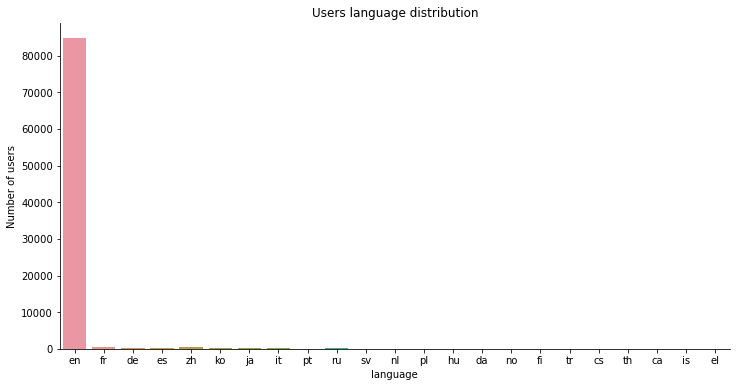

In [340]:
# country 변수 추가 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



merge_c = pd.merge(df,df_country, how='left', left_on='country_destination', right_on='country_destination')




merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)


import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [341]:
merge_c.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2'],
      dtype='object')

In [342]:
merge_final = pd.merge(merge_c,session_final, how='inner',on='id')



In [343]:
merge_final.isnull().sum()

id                                       0
gender                                   0
age                                      0
signup_method                            0
signup_flow                              0
affiliate_channel                        0
affiliate_provider                       0
first_affiliate_tracked                  0
signup_app                               0
first_browser                            0
country_destination                      0
cat_duration                             0
distance_km                              0
destination_km2                          0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_deta

In [344]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'country_destination', 'cat_duration',
       'distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action', 'action_type', 'action_detail', 'device_type',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [345]:
merge_final=merge_final.drop(['action_detail','country_destination'],axis=1)

In [346]:
merge_final.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration', 'distance_km',
       'destination_km2', 'action_count', 'total_secs', 'action',
       'action_type', 'device_type', 'action_detail_user_listings',
       'action_detail_p5', 'action_detail_p3', 'action_detail_message_post',
       'action_detail_p1', 'action_detail_update_user_profile',
       'action_detail_profile_verifications',
       'action_detail_cancellation_policies', 'action_detail_your_trips',
       'action_detail_create_phone_numbers',
       'action_detail_wishlist_content_update', 'action_detail_pending',
       'action_detail_message_thread', 'action_detail_update_listing',
       'action_detail_view_search_results'],
      dtype='object')

In [347]:
merge_final

,id,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,...,action_detail_update_user_profile,action_detail_profile_verifications,action_detail_cancellation_policies,action_detail_your_trips,action_detail_create_phone_numbers,action_detail_wishlist_content_update,action_detail_pending,action_detail_message_thread,action_detail_update_listing,action_detail_view_search_results
0,4rvqpxoh3h,MALE,36.048687,basic,25,direct,direct,untracked,iOS,-unknown-,...,0,0,0,0,0,0.0,0,0.0,0.0,0.0
1,xwxei6hdk4,FEMALE,32.000000,facebook,0,seo,google,linked,Web,Mobile Safari,...,0,0,0,0,0,0.0,0,0.0,0.0,0.0
2,awiurksqr3,FEMALE,32.000000,facebook,0,direct,direct,untracked,Web,Mobile Safari,...,0,0,0,0,0,0.0,0,0.0,0.0,0.0
3,jrqykh9y8x,FEMALE,27.000000,facebook,0,seo,google,linked,Web,Chrome,...,0,0,0,1,1,118.0,0,2.0,0.0,145.0
4,s9xrwtyzsq,MALE,30.000000,basic,0,sem-brand,google,omg,Web,Mobile Safari,...,1,4,0,1,2,9.0,1,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,7plqriggxp,FEMALE,55.000000,basic,0,sem-brand,google,omg,Web,IE,...,0,0,0,0,0,1.0,1,0.0,0.0,7.0
25076,msucfwmlzc,MALE,43.000000,basic,0,direct,direct,untracked,Web,Firefox,...,0,0,2,0,0,0.0,0,0.0,0.0,0.0
25077,omlc9iku7t,FEMALE,34.000000,basic,0,direct,direct,linked,Web,Chrome,...,0,0,0,0,0,4.0,0,0.0,0.0,10.0
25078,0k26r3mir0,FEMALE,36.000000,basic,0,sem-brand,google,linked,Web,Safari,...,0,0,0,0,0,16.0,0,4.0,4.0,38.0


In [348]:
catvar=['gender', 'signup_method', 'signup_flow',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_browser', 'cat_duration','action', 'action_type', 'device_type']

In [349]:
# 더미 데이터 
for c in catvar:
    temp=pd.get_dummies(merge_final[c],prefix=c, drop_first=True)
    merge_final=pd.concat((merge_final,temp),axis=1)

merge_final=merge_final.drop(catvar,axis=1)


In [350]:
merge_final=merge_final.drop(['id'],axis=1)

In [351]:
target=merge_final[['cat_duration_S']]

In [352]:
merge_final=merge_final.drop(['cat_duration_S'],axis=1)

In [353]:
target

,cat_duration_S
0,0
1,1
2,0
3,1
4,0
...,...
25075,0
25076,1
25077,1
25078,1


In [354]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [355]:
merge_final.columns

Index(['age', 'distance_km', 'destination_km2', 'action_count', 'total_secs',
       'action_detail_user_listings', 'action_detail_p5', 'action_detail_p3',
       'action_detail_message_post', 'action_detail_p1',
       ...
       'device_type_Blackberry', 'device_type_Chromebook',
       'device_type_Linux Desktop', 'device_type_Mac Desktop',
       'device_type_Tablet', 'device_type_Windows Desktop',
       'device_type_Windows Phone', 'device_type_iPad Tablet',
       'device_type_iPhone', 'device_type_iPodtouch'],
      dtype='object', length=213)

In [356]:
merge_final['const']=0

In [357]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools


def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}


def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])


Forward_best_model = forward_model(merge_final,target.values)


Processed  213 models on 1 predictors in 0.7722201347351074
Selected predictors: ['age', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f77460650a0>
Processed  212 models on 2 predictors in 0.8947567939758301
Selected predictors: ['age', 'action_detail_pending', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bd8cf40>
Processed  211 models on 3 predictors in 1.0191700458526611
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f773d172430>
Processed  210 models on 4 predictors in 1.165522813796997
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bda2430>
Processed  209 models on 5 predictors in 1.314728021621704
Selected predi

Processed  194 models on 20 predictors in 4.2526421546936035
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772bd87760>
Processed  193 models on 21 predictors in 5.24494194984436
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_

Processed  184 models on 30 predictors in 6.947682857513428
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f772b

Processed  176 models on 38 predictors in 8.167249917984009
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  169 models on 45 predictors in 8.60824966430664
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device_

Processed  163 models on 51 predictors in 9.029871940612793
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  157 models on 57 predictors in 9.436615943908691
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  152 models on 62 predictors in 11.613710165023804
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  147 models on 67 predictors in 12.701038122177124
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  142 models on 72 predictors in 11.429939031600952
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  138 models on 76 predictors in 14.02570390701294
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  134 models on 80 predictors in 13.19763994216919
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'device

Processed  130 models on 84 predictors in 15.096880912780762
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  126 models on 88 predictors in 12.875076055526733
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  122 models on 92 predictors in 17.800143241882324
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

Processed  118 models on 96 predictors in 13.415124893188477
Selected predictors: ['age', 'action_detail_pending', 'affiliate_channel_direct', 'affiliate_provider_google', 'affiliate_provider_other', 'action_detail_create_phone_numbers', 'action_detail_update_listing', 'affiliate_provider_facebook', 'affiliate_provider_bing', 'action_detail_message_post', 'action_identity', 'action_ajax_photo_widget_form_iframe', 'affiliate_provider_padmapper', 'signup_method_facebook', 'affiliate_provider_yahoo', 'signup_app_iOS', 'action_detail_wishlist_content_update', 'total_secs', 'action_update', 'action_search_results', 'distance_km', 'action_show', 'action_detail_cancellation_policies', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook-open-graph', 'action_detail_view_search_results', 'action_personalize', 'action_complete_status', 'affiliate_provider_gsp', 'affiliate_provider_naver', 'action_authenticate', 'action_active', 'device_type_Android App Unknown Phone/Tablet', 'devic

In [358]:
Forward_best_model.summary()


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                 -34.869
Model:                            OLS   Adj. R-squared (uncentered):            -35.004
Method:                 Least Squares   F-statistic:                             -258.4
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        1.00
Time:                        19:49:43   Log-Likelihood:                         -14393.
No. Observations:               25080   AIC:                                  2.897e+04
Df Residuals:                   24986   BIC:                                  2.974e+04
Df Model:                          94                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
age                                             -0.0008      0.000     -2.630      0.009      -0.001      -0.000
action_detail_pending                           -0.3407      0.007    -46.870      0.000      -0.355      -0.326
affiliate_channel_direct                         0.3161      0.013     24.887      0.000       0.291       0.341
affiliate_provider_google                        0.6372      0.026     24.668      0.000       0.587       0.688
affiliate_provider_other                         0.6702      0.043     15.761      0.000       0.587       0.754
action_detail_create_phone_numbers              -0.0450      0.004    -12.355      0.000      -0.052      -0.038
action_detail_update_listing                     0.0068      0.001     10.953      0.000       0.006       0.008
affiliate_provider_facebook                      0.6198      0.039     15.790      0.000       0.543       0.697
affiliate_provider_bing                          0.6176      0.037     16.582      0.000       0.545       0.691
action_detail_message_post                      -0.0132      0.002     -8.469      0.000      -0.016      -0.010
action_identity                                 -0.1907      0.024     -7.831      0.000      -0.238      -0.143
action_ajax_photo_widget_form_iframe            -0.2227      0.028     -7.917      0.000      -0.278      -0.168
affiliate_provider_padmapper                     0.8732      0.079     11.037      0.000       0.718       1.028
signup_method_facebook                           0.0422      0.007      6.064      0.000       0.029       0.056
affiliate_provider_yahoo                         0.7178      0.088      8.146      0.000       0.545       0.891
signup_app_iOS                                   0.0495      0.020      2.523      0.012       0.011       0.088
action_detail_wishlist_content_update            0.0029      0.000      8.025      0.000       0.002       0.004
total_secs                                      -0.0002   2.24e-05     -7.812      0.000      -0.000      -0.000
action_update                                    0.2108      0.027      7.766      0.000       0.158       0.264
action_search_results                            0.0588      0.012      4.804      0.000       0.035       0.083
distance_km                                   5.407e-06   8.71e-07      6.207      0.000     3.7e-06    7.11e-06
action_show                                      0.0199      0.008      2.483      0.013       0.004       0.036
action_detail_cancellation_policies             -0.0218      0.004     -5.738      0.000      -0.029      -0.014
affiliate_provider_email-marketing            

In [361]:
sel_FW1=list(Forward_best_model.params.index)


In [362]:
sel_FW1

['age',
 'action_detail_pending',
 'affiliate_channel_direct',
 'affiliate_provider_google',
 'affiliate_provider_other',
 'action_detail_create_phone_numbers',
 'action_detail_update_listing',
 'affiliate_provider_facebook',
 'affiliate_provider_bing',
 'action_detail_message_post',
 'action_identity',
 'action_ajax_photo_widget_form_iframe',
 'affiliate_provider_padmapper',
 'signup_method_facebook',
 'affiliate_provider_yahoo',
 'signup_app_iOS',
 'action_detail_wishlist_content_update',
 'total_secs',
 'action_update',
 'action_search_results',
 'distance_km',
 'action_show',
 'action_detail_cancellation_policies',
 'affiliate_provider_email-marketing',
 'affiliate_provider_facebook-open-graph',
 'action_detail_view_search_results',
 'action_personalize',
 'action_complete_status',
 'affiliate_provider_gsp',
 'affiliate_provider_naver',
 'action_authenticate',
 'action_active',
 'device_type_Android App Unknown Phone/Tablet',
 'device_type_Android Phone',
 'action_type_view',
 'act

In [420]:
x=merge_final[sel_FW1]

In [421]:
y=target.values

In [422]:
x

,age,action_detail_pending,affiliate_channel_direct,affiliate_provider_google,affiliate_provider_other,action_detail_create_phone_numbers,action_detail_update_listing,affiliate_provider_facebook,affiliate_provider_bing,action_detail_message_post,...,affiliate_channel_seo,action_calendar_tab_inner2,signup_flow_12,first_browser_Opera Mini,first_browser_Maxthon,action_payment_methods,action_ajax_google_translate,action_read_policy_click,affiliate_provider_direct,const
0,36.048687,0,1,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,32.000000,0,0,1,0,0,0.0,0,0,2.0,...,1,0,0,0,0,0,0,0,0,0
2,32.000000,0,1,0,0,0,0.0,0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,27.000000,0,0,1,0,1,0.0,0,0,42.0,...,1,0,0,0,0,0,0,0,0,0
4,30.000000,1,0,1,0,2,0.0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,55.000000,1,0,1,0,0,0.0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
25076,43.000000,0,1,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
25077,34.000000,0,1,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
25078,36.000000,0,0,1,0,0,4.0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
   
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# 예측
y_pred = forest.predict(x_test)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

<ipython-input-428-ca15757b89df>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


정확도 : 0.7355130249867092


In [426]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))




/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6961152882205514


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [429]:
print(model.score(x_test, y_test))

0.7013556618819776


In [389]:
x.to_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/final_x.csv")

In [391]:
target.to_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/final_y.csv")

In [377]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(x.values, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(x)

/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	96
Rejected: 	0


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	7
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 100
Confirmed: 	28
Tentative: 	6
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 100
Confirmed: 	28
Tentative: 	6
Rejected: 	62


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 100
Confirmed: 	28
Tentative: 	5
Rejected: 	63


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 100
Confirmed: 	28
Tentative: 	5
Rejected: 	63


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	65


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 100
Confirmed: 	28
Tentative: 	2
Rejected: 	66


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	67


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	68


BorutaPy finished running.

Iteration: 	44 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	68


TypeError: '(slice(None, None, None), array([ True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]))' is an invalid key

In [378]:
feat_selector.ranking_


array([ 1,  1, 23, 20,  9,  1,  1, 28, 31,  1,  1,  1, 33,  1, 49,  1,  1,
        1,  1,  2,  4,  1,  1, 47, 54,  1,  6, 18, 67, 49,  6,  1, 19, 12,
        1,  1,  1,  1,  1, 15, 38, 41,  3,  8, 30,  8,  1, 18,  1,  1, 33,
       10, 67, 44, 50, 36, 14, 35, 38,  1, 11, 21, 13, 22, 53, 46, 34, 40,
        1, 25, 51, 64, 25, 56, 42, 64,  1,  1, 61, 64, 59, 52, 27, 56, 29,
       45, 16, 44,  2, 57, 64, 39, 61, 59, 25, 67])

In [382]:
feat_selector.support_


array([ True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [383]:
li_final=list(feat_selector.support_)

In [384]:
li_final

[True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [387]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))

import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

get_clf_eval(y_test, preds)        


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [175]:

subset=merge_left[merge_left['action_detail'].isin(new_col_ma)]



subset.head()

is_s=subset['cat_duration']=='S'
is_f=subset['cat_duration']=='F'
subset_s = subset[is_s]
subset_f = subset[is_f]

# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


list_s=subset_s1.head(50).index

list_f=subset_f1.head(50).index

#중복된거 뺀다.
re_s=list_s.difference(list_f)

#중복된거 뺀다. 
re_f=list_f.difference(list_s)

#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
# 
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


mean_s

subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

sub

sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


sub

detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']


subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


sel_s1=subset_s1.index

sel_f1=subset_f1.index

rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

rem_s1

rem_f1


union_s = list(set(rem_s1) | set(re_s) | set(sel_s1))
union_f = list(set(rem_f1) | set(re_f) | set(sel_f1))


union_s

union_f

# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'